<a href="https://colab.research.google.com/github/Fatima36215/DATA-MINING/blob/main/cnn_project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: write code to connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Reshaped Training Set (73257, 32, 32, 3) (73257, 1)
Reshaped Test Set (26032, 32, 32, 3) (26032, 1)
Training Set (58605, 32, 32, 3) (58605, 10)
Validation Set (14652, 32, 32, 3) (14652, 10)
Test Set (26032, 32, 32, 3) (26032, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.4083 - loss: 1.7072 - val_accuracy: 0.8379 - val_loss: 0.5395
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.8230 - loss: 0.6048 - val_accuracy: 0.8720 - val_loss: 0.4388
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 84s 92ms/step - accuracy: 0.8566 - loss: 0.4870 - val_accuracy: 0.8873 - val_loss: 0.3809
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 84s 92ms/step - accuracy: 0.8742 - loss: 0.4308 - val_accuracy: 0.8924 - val_loss: 0.3596
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 86s 94ms/step - accuracy: 0.8847 - loss: 0.3931 - val_accuracy: 0.8989 - val_loss: 0.3504
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 138s 90ms/step - accuracy: 0.8922 - loss: 0.3645 - val_accuracy: 0.9029 - val_loss: 0.3375
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.8959 - loss: 0.3508 - val_accuracy: 0.9045 - val_loss: 0.3296
Epoch 8/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 138s 89ms/step - accuracy: 0.9037 - loss: 0.3273

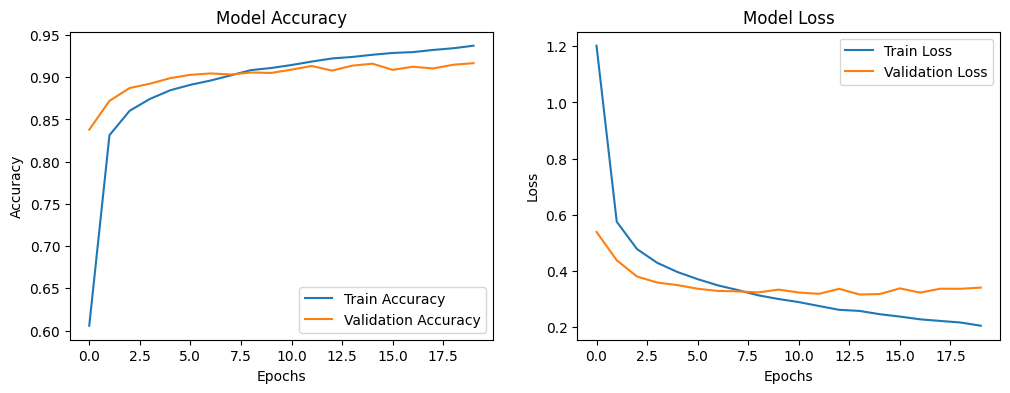

In [2]:
# Install necessary libraries
!pip install mat73

import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dataset_path = '/content/drive/MyDrive/model project/train_32x32 (1).mat'
test_dataset_path = '/content/drive/MyDrive/model project/test_32x32.mat'

# Load data function
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)  # Since the original dataset isn't using mat73 but loadmat
    return data['X'], data['y']

# Load training and test data
X_train, y_train = load_data(train_dataset_path)
X_test, y_test = load_data(test_dataset_path)

# Inspect the shape
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

# Transpose the dataset: (width, height, channels, samples) -> (samples, width, height, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

print("Reshaped Training Set", X_train.shape, y_train.shape)
print("Reshaped Test Set", X_test.shape, y_test.shape)

# Normalize the image data (from 0-255 to 0-1)
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

# Handle label 10 (which represents '0') as 0 for classification
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set", X_train.shape, y_train.shape)
print("Validation Set", X_val.shape, y_val.shape)
print("Test Set", X_test.shape, y_test.shape)

### Building the CNN Model
def build_model():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolution layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (10 digits, softmax activation for classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
model = build_model()

# Print model summary
model.summary()

### Training the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

### Evaluating the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

### Plotting Training History
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

814/814 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step


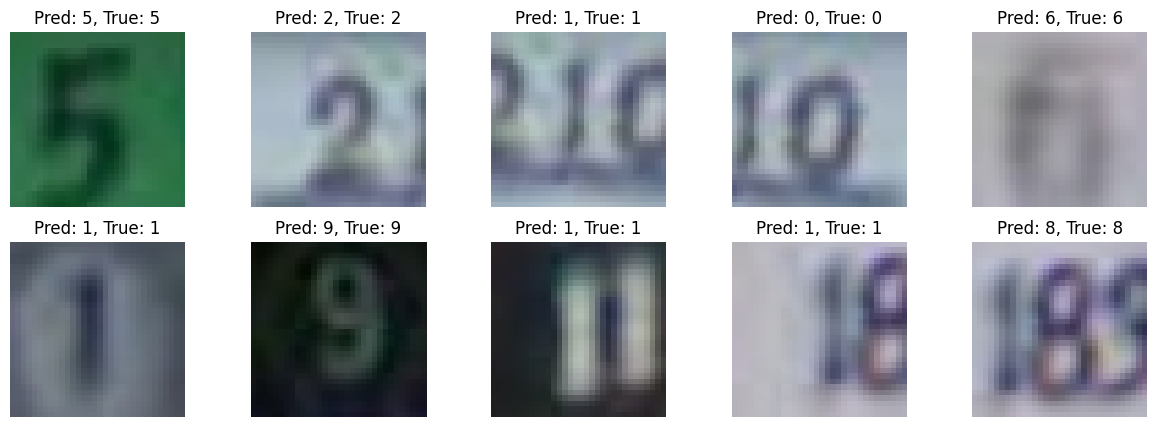

In [3]:
# prompt: write a code to show predicted images and true images

import matplotlib.pyplot as plt
import numpy as np
# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Show some predicted images and their true labels
num_images_to_show = 10
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    plt.subplot(2, num_images_to_show // 2, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true_classes[i]}")
    plt.axis('off')
plt.show()


In [4]:
# prompt: write a code to save and load model

# Save the model
model.save('/content/drive/MyDrive/model project/my_model.h5')  # Replace with your desired path

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/model project/my_model.h5')  # Replace with the path where you saved the model

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Loaded model test accuracy: {test_acc * 100:.2f}%')


814/814 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9095 - loss: 0.3819
Loaded model test accuracy: 91.08%


Saving 2.jpg to 2.jpg
User uploaded file "2.jpg" with length 685 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


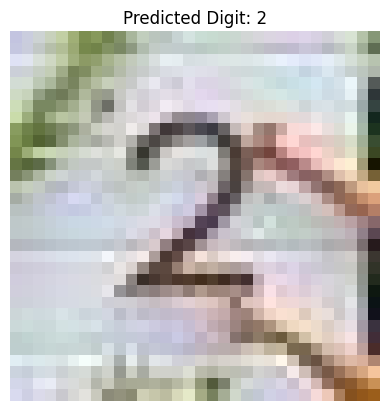

Predicted digit: 2


In [5]:
# prompt: write a code to make user interface so that the user give input images for prediction

from google.colab import files
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
loaded_model = load_model('/content/drive/MyDrive/model project/my_model.h5')

def predict_image(uploaded_image):
  """Predicts the digit in the uploaded image."""

  try:
    image = Image.open(io.BytesIO(uploaded_image))
    image = image.resize((32, 32))
    image = np.array(image)

    # Preprocess the image (normalize, reshape)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    # Make the prediction
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction)

    plt.imshow(image[0])
    plt.title(f"Predicted Digit: {predicted_class}")
    plt.axis('off')
    plt.show()

    print(f"Predicted digit: {predicted_class}")

  except Exception as e:
    print(f"Error processing image: {e}")

# Upload the image using a file upload widget
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  predict_image(uploaded[fn])
